# 01_EDA

## Equipo 1

## Cargar los datos y librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/raw.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Exploración de los datos

### Dimensiones del dataset


In [2]:
df.shape

(891, 12)

### Tipo de datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Valores nulos

In [4]:
print('Valores nulos por columna')
print()
df.isna().sum()

Valores nulos por columna



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
print()
print('Porcentaje de valores nulos por columna')
print()
(df.isna().sum() / len(df) ) * 100


Porcentaje de valores nulos por columna



PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### Valores atípicos

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df[df['Fare'] > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [8]:
df[df['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


### Reporte de salud

In [9]:
print("Reporte de salud del dataset Titanic\n")
print(f"Dimensiones del dataset: {df.shape}")
print("\nTipos de datos por columna:")
print(df.dtypes)
print("\nValores nulos por columna:")
print(df.isna().sum())
print("\nPorcentaje de valores nulos por columna:")
print((df.isna().sum() / len(df)) * 100)
print("\nEstadísticas descriptivas:")
print(df.describe(include='all'))

Reporte de salud del dataset Titanic

Dimensiones del dataset: (891, 12)

Tipos de datos por columna:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Valores nulos por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Porcentaje de valores nulos por columna:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.2244

Podemos observar que en general, el dataset cuenta con una muy "buena salud" ya que no hay tantos valores nulos y no hay mucha limpiza que hacer. La única variable que si puede llegar a causar problemas es edad debido a su cantidad de valores nulos y que si podría llegar a ser una variable de peso como para eliminarla. Sin embargo, fuera de eso el dataset puede ser analizado sin mayor problema.

## Estadística descriptiva

### Variables númericas

In [10]:
vars_num = ['Age', 'SibSp', 'Parch', 'Fare']
for var in vars_num:
    print(f"\nAnálisis de la variable numérica: {var}")
    print(f"Media: {df[var].mean()}")
    print(f"Mediana: {df[var].median()}")
    print(f"Desviación estándar: {df[var].std()}")
    print(f"Máximo: {df[var].max()}")
    print(f"Mínimo: {df[var].min()}")
    print(f"Cuartiles:\n{df[var].quantile([0.25, 0.5, 0.75])}")


Análisis de la variable numérica: Age
Media: 29.69911764705882
Mediana: 28.0
Desviación estándar: 14.526497332334042
Máximo: 80.0
Mínimo: 0.42
Cuartiles:
0.25    20.125
0.50    28.000
0.75    38.000
Name: Age, dtype: float64

Análisis de la variable numérica: SibSp
Media: 0.5230078563411896
Mediana: 0.0
Desviación estándar: 1.1027434322934317
Máximo: 8
Mínimo: 0
Cuartiles:
0.25    0.0
0.50    0.0
0.75    1.0
Name: SibSp, dtype: float64

Análisis de la variable numérica: Parch
Media: 0.38159371492704824
Mediana: 0.0
Desviación estándar: 0.8060572211299483
Máximo: 6
Mínimo: 0
Cuartiles:
0.25    0.0
0.50    0.0
0.75    0.0
Name: Parch, dtype: float64

Análisis de la variable numérica: Fare
Media: 32.204207968574636
Mediana: 14.4542
Desviación estándar: 49.6934285971809
Máximo: 512.3292
Mínimo: 0.0
Cuartiles:
0.25     7.9104
0.50    14.4542
0.75    31.0000
Name: Fare, dtype: float64


Podemos observar que hay valores atípicos en variables como Fare donde a media es de 32 pero hay tarifas que llegan hasta los 500, además de que su desviación estandar es casi del doble que de la media, indicando que hay mucha variabilidad en dicha variable. 

### Variables categóricas

In [11]:
vars_cat = ['Survived', 'Pclass', 'Embarked']
for var in vars_cat:
    print(f"\nAnálisis de la variable categórica: {var}")
    print(f"Frecuencia de valores:\n{df[var].value_counts()}")


Análisis de la variable categórica: Survived
Frecuencia de valores:
Survived
0    549
1    342
Name: count, dtype: int64

Análisis de la variable categórica: Pclass
Frecuencia de valores:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Análisis de la variable categórica: Embarked
Frecuencia de valores:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


### Análisis de variable objetivo (survived)

Análisis de la variable objetivo: Survived

Frecuencia absoluta:
Survived
0    549
1    342
Name: count, dtype: int64

Frecuencia relativa (%):
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


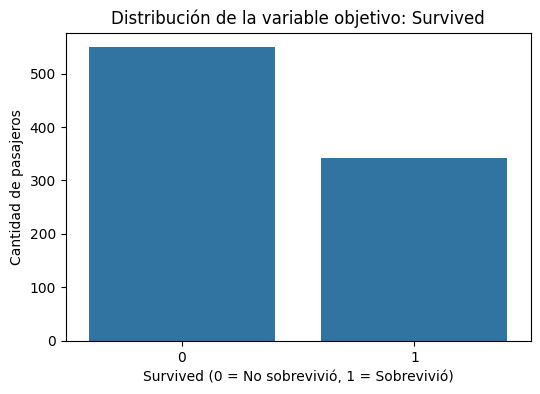

In [12]:
print("Análisis de la variable objetivo: Survived\n")
print("Frecuencia absoluta:")
print(df['Survived'].value_counts())
print("\nFrecuencia relativa (%):")
print(df['Survived'].value_counts(normalize=True) * 100)

plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title("Distribución de la variable objetivo: Survived")
plt.xlabel("Survived (0 = No sobrevivió, 1 = Sobrevivió)")
plt.ylabel("Cantidad de pasajeros")
plt.show()

Como vemos, hubo mas personas que no sobreviveron que las que si, sin embargo mas adelante se plantea explorar mas a detalle que influyó en aquellas personas que sobrevivieron y en las que no

### Estadísticas agrupadas por clase, género y edad

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


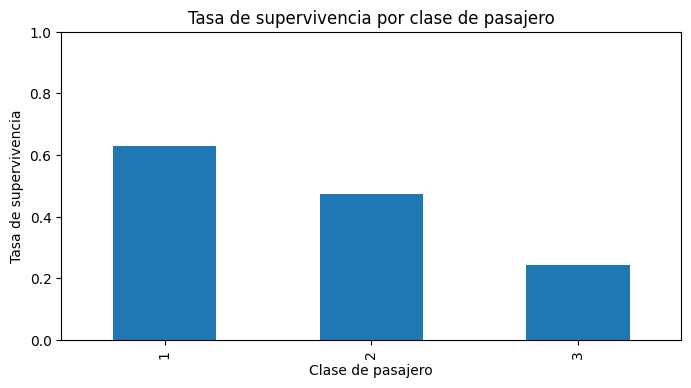

In [13]:
print(df.groupby('Pclass')['Survived'].mean())
df.groupby('Pclass')['Survived'].mean().plot(kind='bar', figsize=(8, 4))
plt.title('Tasa de supervivencia por clase de pasajero')
plt.ylabel('Tasa de supervivencia')
plt.xlabel('Clase de pasajero')
plt.ylim(0, 1)
plt.show()

Aquí vemos el primer gran diferenciador, la clase social. La clase social jugó un papel sumamente importante ya que la clase alta y de poder socioeconómico alto pudo pagar lugares de primera clase y dicha clase fue la que mas supervivencia tuvo, mientras que la segunda también tuvo una supervivencia de más del 50% y la tercera no llegó ni al 40%

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


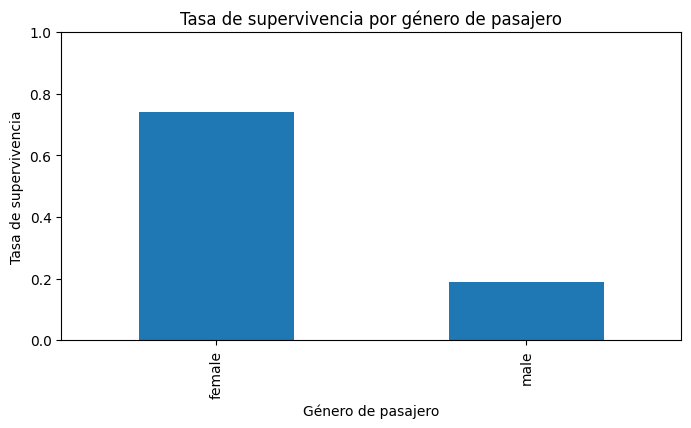

In [14]:
print(df.groupby('Sex')['Survived'].mean())
df.groupby('Sex')['Survived'].mean().plot(kind='bar', figsize=(8, 4))
plt.title('Tasa de supervivencia por género de pasajero')
plt.ylabel('Tasa de supervivencia')
plt.xlabel('Género de pasajero')
plt.ylim(0, 1)
plt.show()

El segundo gran factor fue el del género. Las mujeres tuvieron una superviencia de casi el 80%, mientras que la del hombre fue del 25% aproximadamente.

Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 88, dtype: float64


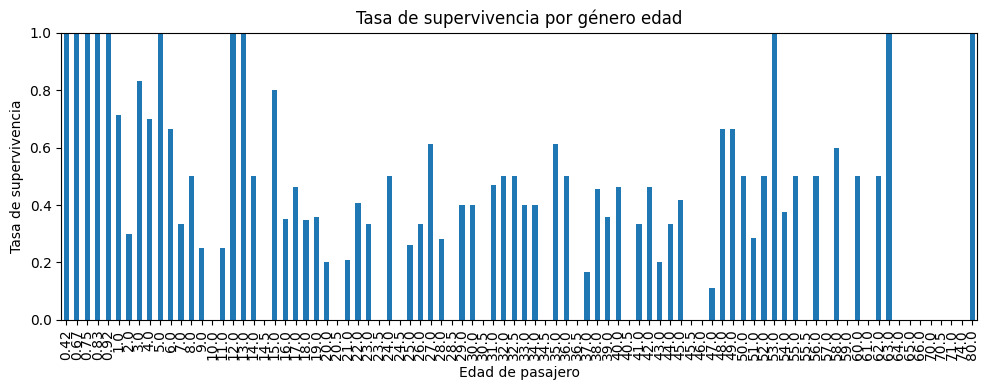

In [15]:
print(df.groupby('Age')['Survived'].mean())
df.groupby('Age')['Survived'].mean().plot(kind='bar', figsize=(10, 4))
plt.title('Tasa de supervivencia por género edad')
plt.ylabel('Tasa de supervivencia')
plt.xlabel('Edad de pasajero')
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylim(0, 1)
plt.show()

AgeGroup
Niño            0.579710
Adolescente     0.428571
Joven Adulto    0.382682
Adulto          0.400000
Mayor           0.227273
Name: Survived, dtype: float64


C:\Users\ivanl\AppData\Local\Temp\ipykernel_17212\1348251332.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_agegroup = df.groupby('AgeGroup')['Survived'].mean()


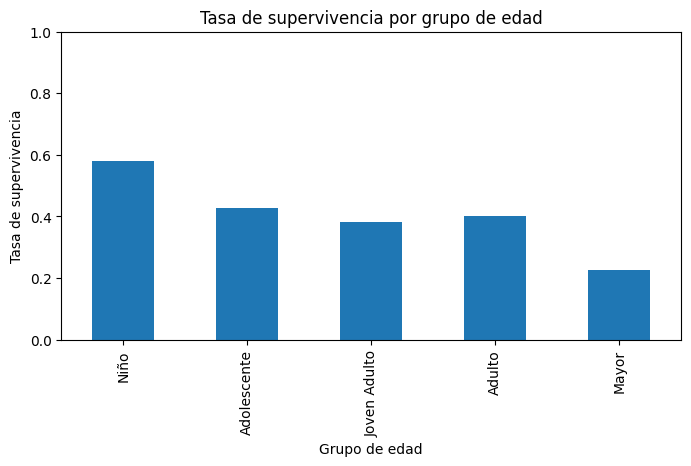

In [16]:
bins = [0, 12, 18, 35, 60, np.inf]
labels = ['Niño', 'Adolescente', 'Joven Adulto', 'Adulto', 'Mayor']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

survival_by_agegroup = df.groupby('AgeGroup')['Survived'].mean()
print(survival_by_agegroup)
survival_by_agegroup.plot(kind='bar', figsize=(8, 4))
plt.title('Tasa de supervivencia por grupo de edad')
plt.ylabel('Tasa de supervivencia')
plt.xlabel('Grupo de edad')
plt.ylim(0, 1)
plt.show()

Aquí podemos observar un poco más el criterio de mujeres y niños primero ya que observamos como los niños fueron del grupo que ams supervivencia tuvo.

C:\Users\ivanl\AppData\Local\Temp\ipykernel_17212\2808051845.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_agegroup = df.groupby(['Sex','AgeGroup'])['Survived'].mean()


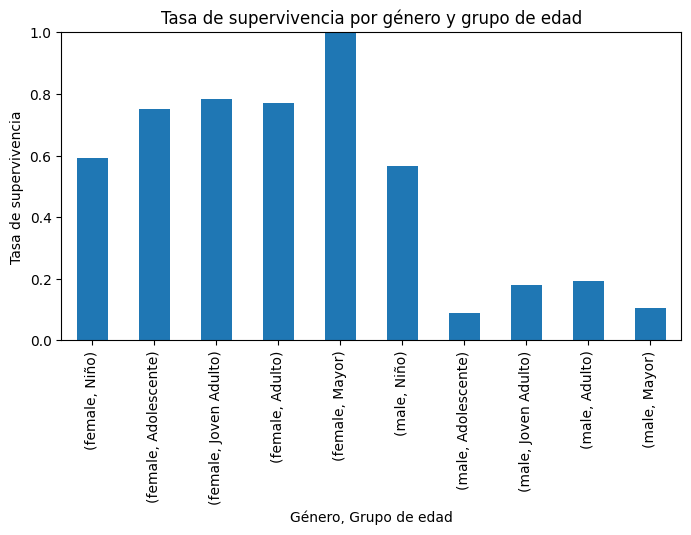

In [17]:
bins = [0, 12, 18, 35, 60, np.inf]
labels = ['Niño', 'Adolescente', 'Joven Adulto', 'Adulto', 'Mayor']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

survival_by_agegroup = df.groupby(['Sex','AgeGroup'])['Survived'].mean()

survival_by_agegroup.plot(kind='bar', figsize=(8, 4))
plt.title('Tasa de supervivencia por género y grupo de edad')
plt.ylabel('Tasa de supervivencia')
plt.xlabel('Género, Grupo de edad')
plt.ylim(0, 1)
plt.show()

Y en este detalle podemos observar mucho mejor que los niños y mujeres de cualquier edad fueron que tuvieron la mayor tasa de supervivencia, todos por arriba del 50%, mientras que los hombres no llegaron ni al 30% sin importar su edad a exepción de los niños los cuales si tuvieron una tasa de mas del 50%

## Visualización Univariada

### Distribución de edad

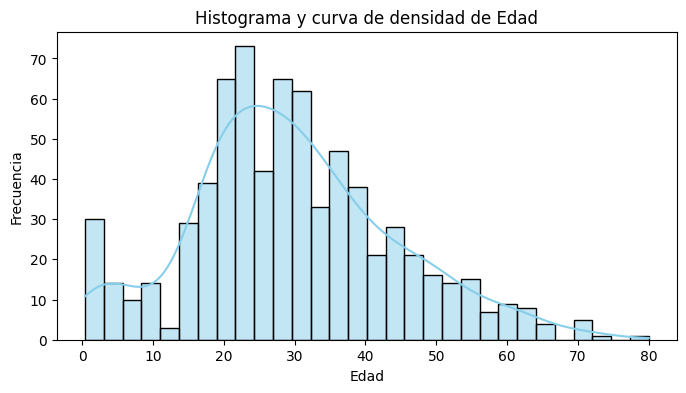

In [18]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Histograma y curva de densidad de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

### Distribución de tarifa pagada

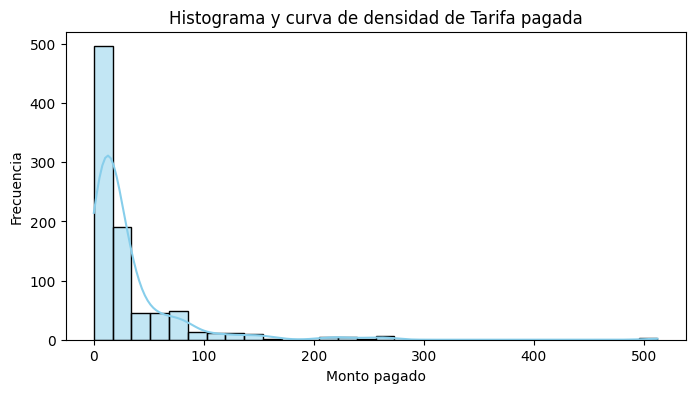

In [19]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Fare'], kde=True, bins=30, color='skyblue')
plt.title('Histograma y curva de densidad de Tarifa pagada')
plt.xlabel('Monto pagado')
plt.ylabel('Frecuencia')
plt.show()

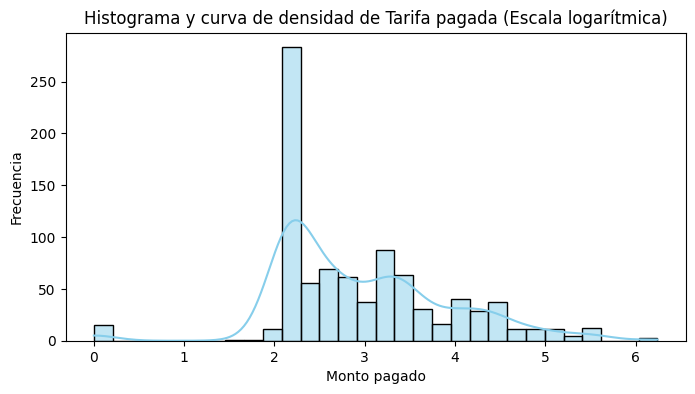

In [20]:
plt.figure(figsize=(8, 4))
sns.histplot(np.log(df['Fare']+1), kde=True, bins=30, color='skyblue')
plt.title('Histograma y curva de densidad de Tarifa pagada (Escala logarítmica)')
plt.xlabel('Monto pagado')
plt.ylabel('Frecuencia')
plt.show()

### Variables categóricas


Análisis de la variable categórica: Survived


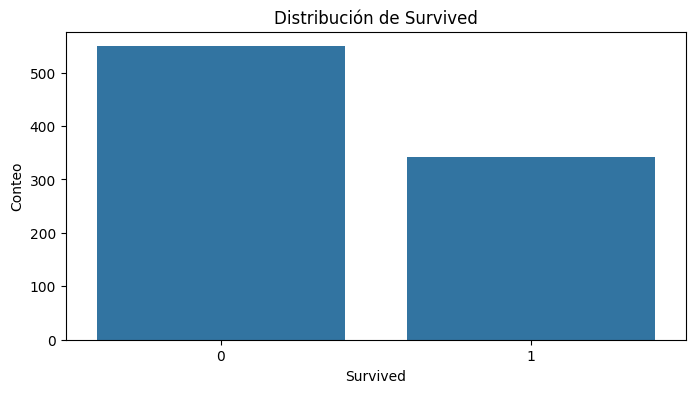


Análisis de la variable categórica: Pclass


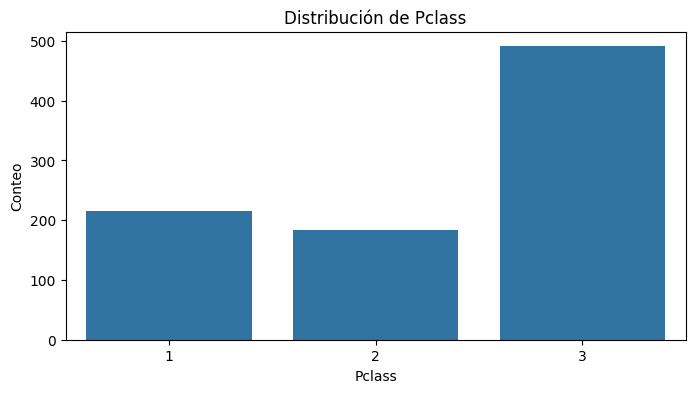


Análisis de la variable categórica: Embarked


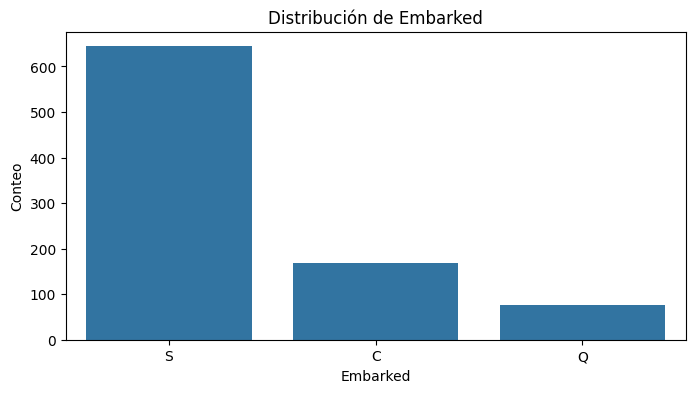

In [21]:
vars_cat = ['Survived', 'Pclass', 'Embarked']
for var in vars_cat:
    print(f"\nAnálisis de la variable categórica: {var}")
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[var])
    plt.ylabel('Conteo')
    plt.title(f"Distribución de {var}")
    plt.show()

### Boxplot para identificar outliers


Análisis de la variable numérica: Age


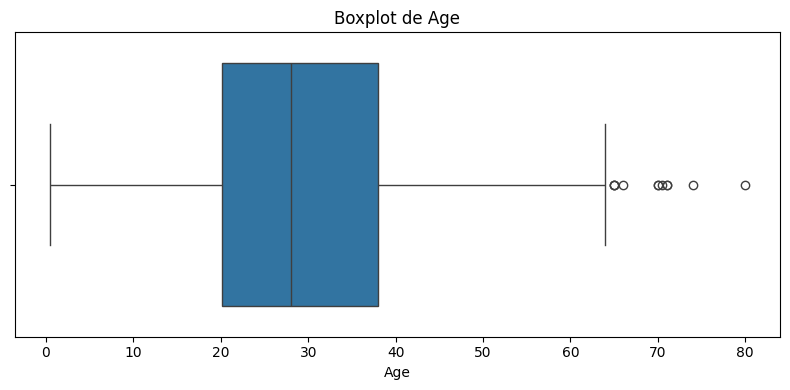


Análisis de la variable numérica: SibSp


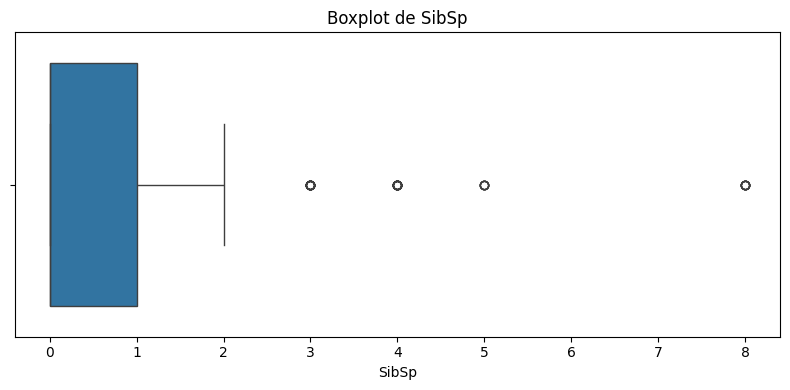


Análisis de la variable numérica: Parch


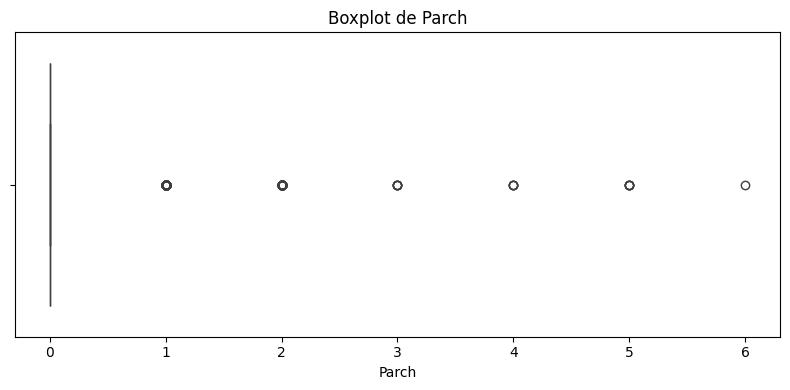


Análisis de la variable numérica: Fare


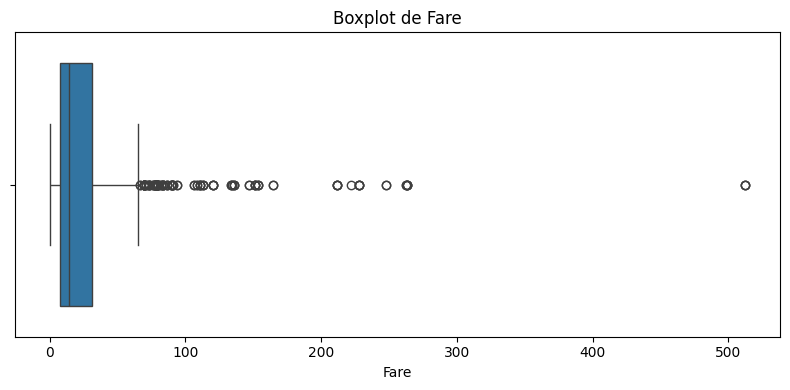

In [22]:
columns = ['Age','SibSp','Parch','Fare']


for col in columns:
    print(f"\nAnálisis de la variable numérica: {col}")
    plt.figure(figsize=(8, 4))
    plt.title(f"Boxplot de {col}")
    sns.boxplot(x=df[col])
    plt.tight_layout()
    plt.show()

## Análisis Bivariado y Multivariado

### Supervivencia por género y clase y edad

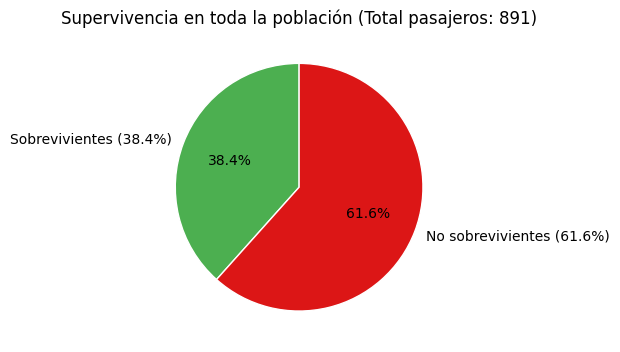

In [23]:
total = len(df)
survivors = int(df["Survived"].sum())
non_survivors = total - survivors
pct_surv = survivors / total * 100

# Datos y etiquetas
sizes = [survivors, non_survivors]
labels = [f"Sobrevivientes ({pct_surv:.1f}%)", f"No sobrevivientes ({100-pct_surv:.1f}%)"]
colors = ["#4CAF50", "#DC1616"]  # verde y gris

# Gráfico de pastel
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(
    sizes, labels=labels, autopct="%1.1f%%", startangle=90,
    colors=colors, wedgeprops={'edgecolor': 'white'}
)

# Título
plt.title(f"Supervivencia en toda la población (Total pasajeros: {total})")
plt.tight_layout()
plt.show()

In [24]:
sex_class_stats = df.groupby(['Sex', 'Pclass'])['Survived'].agg(['count', 'mean']).round(3)
sex_class_stats = sex_class_stats.sort_values('mean', ascending=False)

print("Supervivencia por Sexo y Clase:")
print(sex_class_stats)

Supervivencia por Sexo y Clase:
               count   mean
Sex    Pclass              
female 1          94  0.968
       2          76  0.921
       3         144  0.500
male   1         122  0.369
       2         108  0.157
       3         347  0.135


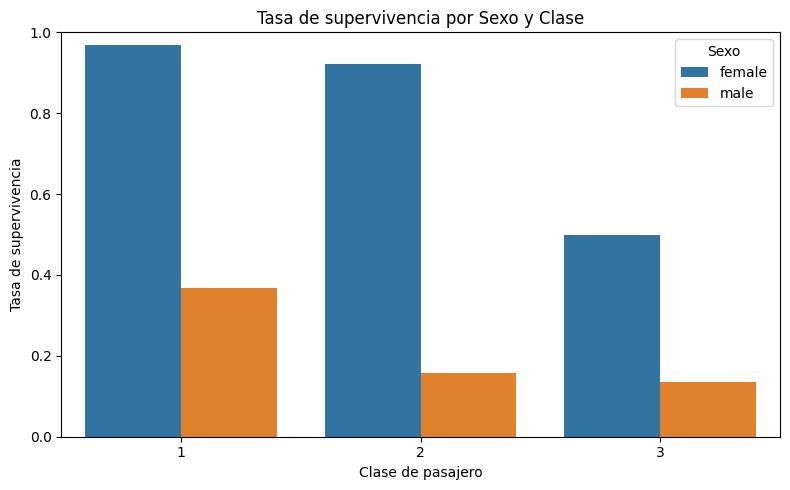

In [25]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=sex_class_stats.reset_index(),
    x='Pclass',
    y='mean',
    hue='Sex'
)
plt.title('Tasa de supervivencia por Sexo y Clase')
plt.ylabel('Tasa de supervivencia')
plt.xlabel('Clase de pasajero')
plt.ylim(0, 1)
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

Aquí se ve un poco más detallado como es que la clase y el género fueron de los factores mas fuertes ya que vemos como las mujeres de primera y segunda clase tuvieron una tasa de supervivencia casi del 100% mientras que las mujeres de tercera casi del 60%. Sin embargo los demás grupos que son de hombres no llegaron ni al 40% sin importar la clase. Aquí vemos que fue mas importante el género que la clase.


=== Clase 1 ===
Survived         Total  Sobrevivieron  No sobrevivieron  % Sobrev.   % No
Cat                                                                      
Hombre – Bebé        1              1                 0      100.0    0.0
Hombre – Niño        3              3                 0      100.0    0.0
Hombre – Adulto     91             35                56       38.5   61.5
Hombre – Viejo       6              1                 5       16.7   83.3
Mujer – Bebé         1              0                 1        0.0  100.0
Mujer – Niño         7              7                 0      100.0    0.0
Mujer – Adulto      77             75                 2       97.4    2.6
Mujer – Viejo        0              0                 0        0.0    0.0

=== Clase 2 ===
Survived         Total  Sobrevivieron  No sobrevivieron  % Sobrev.   % No
Cat                                                                      
Hombre – Bebé        8              8                 0      100.0    0.0
Homb

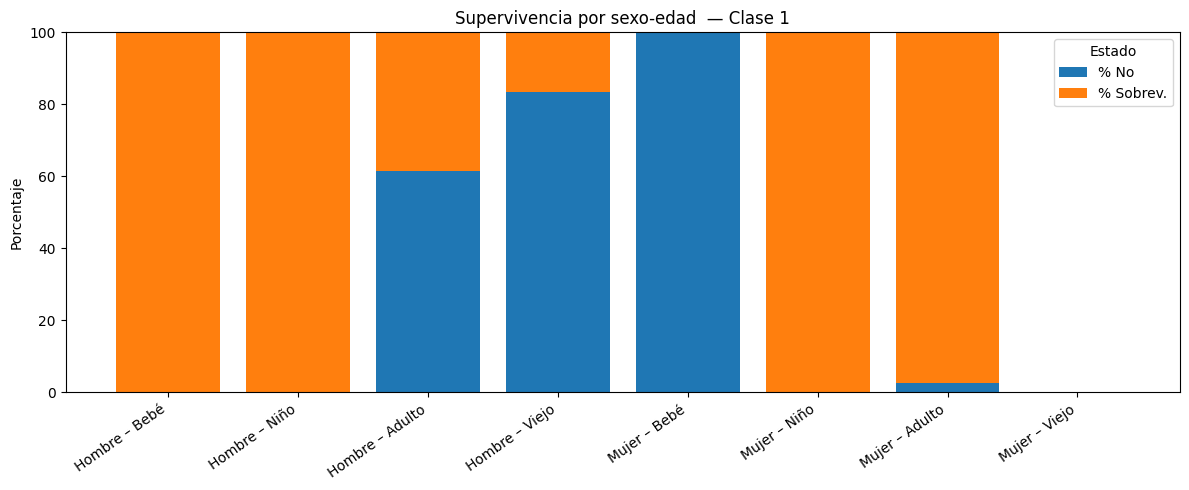

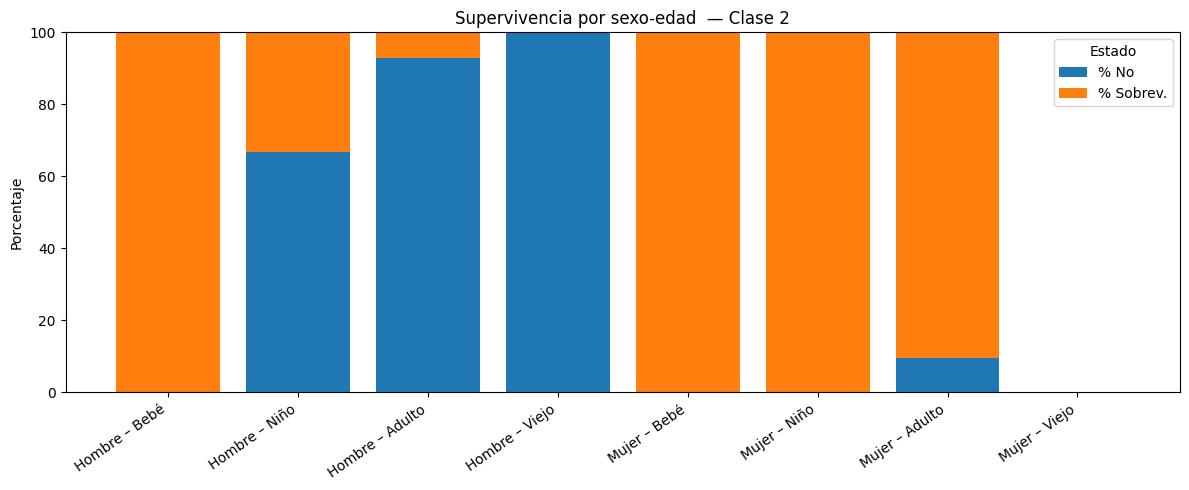

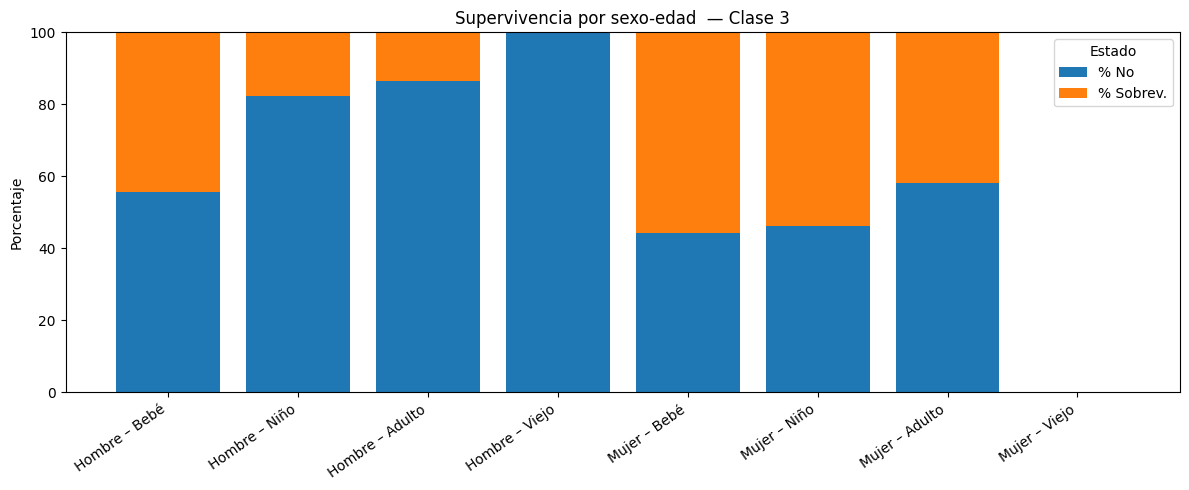

In [26]:
bins   = [0, 4, 18, 65, np.inf]        # [0–3]=Bebé, [4–17]=Niño, [18–64]=Adulto, 65+=Viejo
labels = ["Bebé", "Niño", "Adulto", "Viejo"]
df["GrupoEdad"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)


map_sex = {"male": "Hombre", "female": "Mujer"}
df["Sexo"] = df["Sex"].map(map_sex)
df["Cat"]  = df["Sexo"].astype(str) + " – " + df["GrupoEdad"].astype(str)


orden_clase = [1, 2, 3]
orden_cat   = [f"{s} – {e}" for s in ["Hombre", "Mujer"] for e in labels]


res = (
    df.groupby(["Pclass", "Cat", "Survived"])
      .size().rename("conteo").reset_index()
    .set_index(["Pclass","Cat","Survived"])
    .reindex(
        pd.MultiIndex.from_product([orden_clase, orden_cat, [0,1]],
                                   names=["Pclass","Cat","Survived"]),
        fill_value=0
    )
    .reset_index()
)

tab = (
    res.pivot(index=["Pclass","Cat"], columns="Survived", values="conteo")
      .rename(columns={1:"Sobrevivieron", 0:"No sobrevivieron"})
      .fillna(0).astype(int)
)

tab["Total"]      = tab["Sobrevivieron"] + tab["No sobrevivieron"]
tab["% Sobrev."]  = (100*tab["Sobrevivieron"]/tab["Total"]).round(1).replace([np.inf,np.nan],0)
tab["% No"]       = (100*tab["No sobrevivieron"]/tab["Total"]).round(1).replace([np.inf,np.nan],0)
tab = tab.loc[(slice(None), orden_cat), ["Total","Sobrevivieron","No sobrevivieron","% Sobrev.","% No"]]


for pc in orden_clase:
    print(f"\n=== Clase {pc} ===")
    print(tab.loc[pc].to_string())


for pc in orden_clase:
    bloque = tab.loc[pc].reset_index()
    x = bloque["Cat"]
    y_no  = bloque["% No"]
    y_si  = bloque["% Sobrev."]

    plt.figure(figsize=(12,5))
    plt.bar(x, y_no, label="% No")
    plt.bar(x, y_si, bottom=y_no, label="% Sobrev.")
    plt.title(f"Supervivencia por sexo-edad  — Clase {pc}")
    plt.ylabel("Porcentaje")
    plt.xticks(rotation=35, ha="right")
    plt.legend(title="Estado")
    plt.tight_layout()
    plt.show()


En estas graficas tenemos el panorama completo de la supervivencia por clase, género y edad.
Podemos observar que el “mujeres y niños primero” aplicó perfectamente en las primeras dos clases ya que la supervivencia de estos grupos fue casi del 100% y para la tercera clase podemos observar que se sigue viendo un patrón en donde sobrevivieron más las mujeres pero en cuanto a la supervivencia de niños hombres y adultos fue casi de la misma. Y este comportamiento donde la primera clase y segunda tiene comportamientos similares y la tercera clase para ser una excepción no es un comportamiento único de estas variables.


### Matriz de correlación entre variables numéricas

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


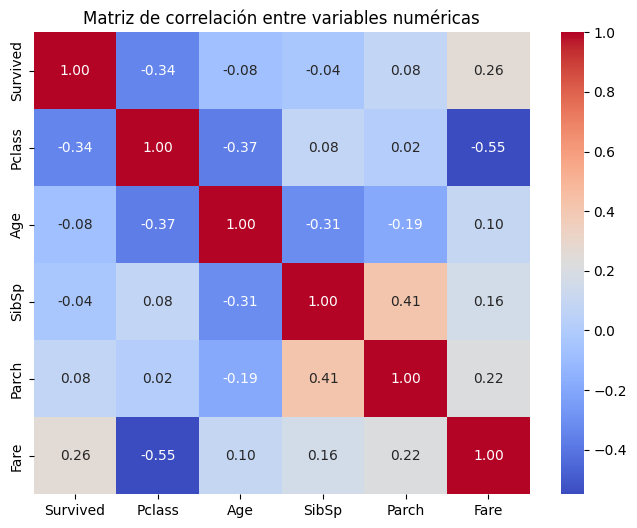

In [27]:
# Matriz de correlación entre variables numéricas
correlation_matrix = df.select_dtypes(include=[np.number]).drop(columns=['PassengerId']).corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

Vemos que en si no hay muchas correlaciones fuertes entre variables. Podemos destacar la de SibSp y Parch, así como Fare y Survived. Y evidentemente Pclass y Fare iban a tener una correlación

### Supervivencia por puerto de embarque

Distribución de Pclass por Deck (sobrevivientes, sin Unknown):
Pclass    1   2    3  Total
Deck                       
A         7   0    0      7
B        35   0    0     35
C        35   0    0     35
D        22   3    0     25
E        18   3    3     24
F         0   7    1      8
G         0   0    2      2
Unknown  19  74  113    206


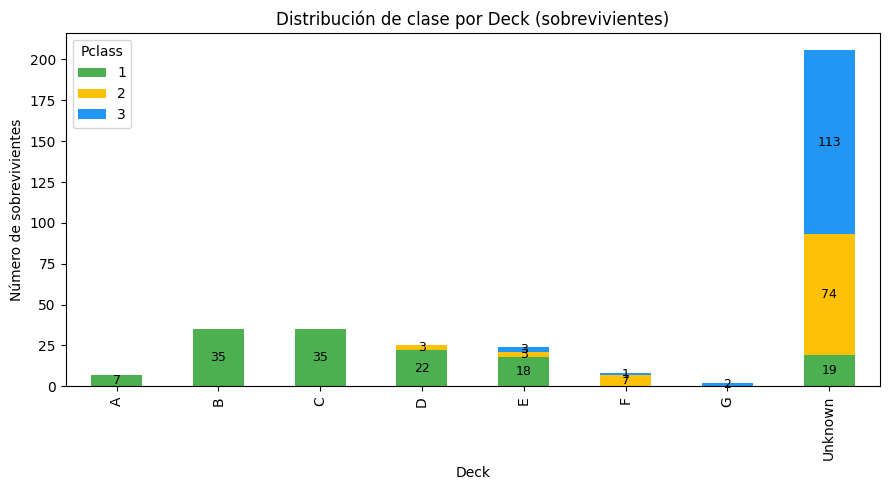

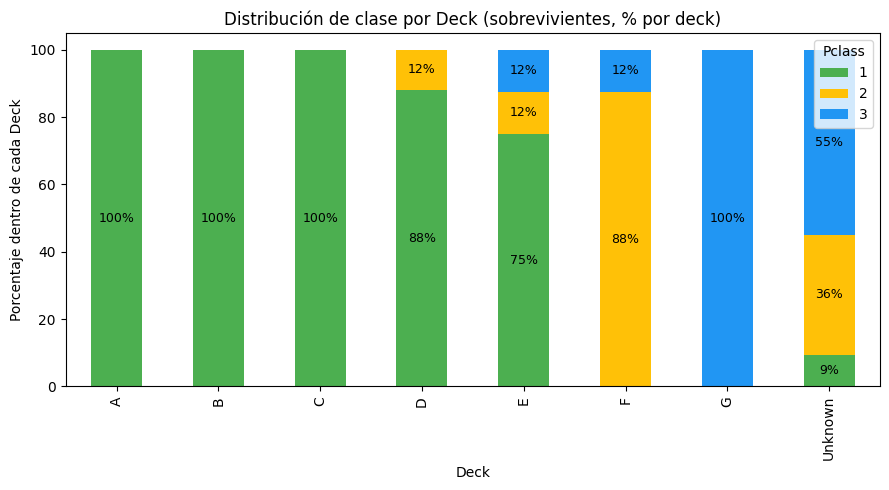


Totales globales por clase (sobrevivientes):
Pclass
1    136
2     87
3    119


In [28]:
df2 = df.copy()

df2["Deck"] = df2["Cabin"].astype(str).str[0]
df2.loc[df2["Cabin"].isna() | (df2["Deck"].str.lower() == "n"), "Deck"] = "Unknown"

allowed_decks = list("ABCDEFGT") + ['Unknown']
surv = df2.query("Survived == 1").copy()
surv = surv[surv["Deck"].isin(allowed_decks)]

surv["Deck"] = pd.Categorical(surv["Deck"], categories=allowed_decks, ordered=True)
pclass_order = [1, 2, 3]

deck_class_counts = (
    pd.crosstab(surv["Deck"], surv["Pclass"])
      .reindex(columns=pclass_order)
      .fillna(0)
      .astype(int)
)
deck_class_counts["Total"] = deck_class_counts.sum(axis=1)

print("Distribución de Pclass por Deck (sobrevivientes, sin Unknown):")
print(deck_class_counts)

colors = {1: "#4CAF50", 2: "#FFC107", 3: "#2196F3"}
ax = deck_class_counts[pclass_order].plot(
    kind="bar", stacked=True, figsize=(9, 5),
    color=[colors[c] for c in pclass_order]
)
ax.set_title("Distribución de clase por Deck (sobrevivientes)")
ax.set_xlabel("Deck")
ax.set_ylabel("Número de sobrevivientes")
ax.legend(title="Pclass", loc="best")

for i, (_, row) in enumerate(deck_class_counts[pclass_order].iterrows()):
    y = 0
    for c in pclass_order:
        v = row[c]
        if v > 0:
            ax.text(i, y + v/2, f"{int(v)}", ha="center", va="center", fontsize=9)
            y += v

plt.tight_layout()
plt.show()

plot_pct = (
    deck_class_counts[pclass_order]
      .div(deck_class_counts["Total"], axis=0)
      .replace([np.inf, np.nan], 0)
      .mul(100).round(1)
)

ax = plot_pct.plot(
    kind="bar", stacked=True, figsize=(9, 5),
    color=[colors[c] for c in pclass_order]
)
ax.set_title("Distribución de clase por Deck (sobrevivientes, % por deck)")
ax.set_xlabel("Deck")
ax.set_ylabel("Porcentaje dentro de cada Deck")
ax.legend(title="Pclass", loc="best")

for i, (_, row) in enumerate(plot_pct.iterrows()):
    y = 0
    for c in pclass_order:
        v = row[c]
        if v > 0:
            ax.text(i, y + v/2, f"{v:.0f}%", ha="center", va="center", fontsize=9)
            y += v

plt.tight_layout()
plt.show()

print("\nTotales globales por clase (sobrevivientes):")
print(deck_class_counts[pclass_order].sum().to_string())

Observamos que las cabinas de la A a la E pertenecían mayormente a la primera clase y probablemente, fueran las cabinas mas cercanas a los botes salvavidas, mientras que las cabinas F,G fueron destinadas a las demás clases y seguramente, mucho mas alejadas de los botes salvavidas

### Análisis de tarifa por clase

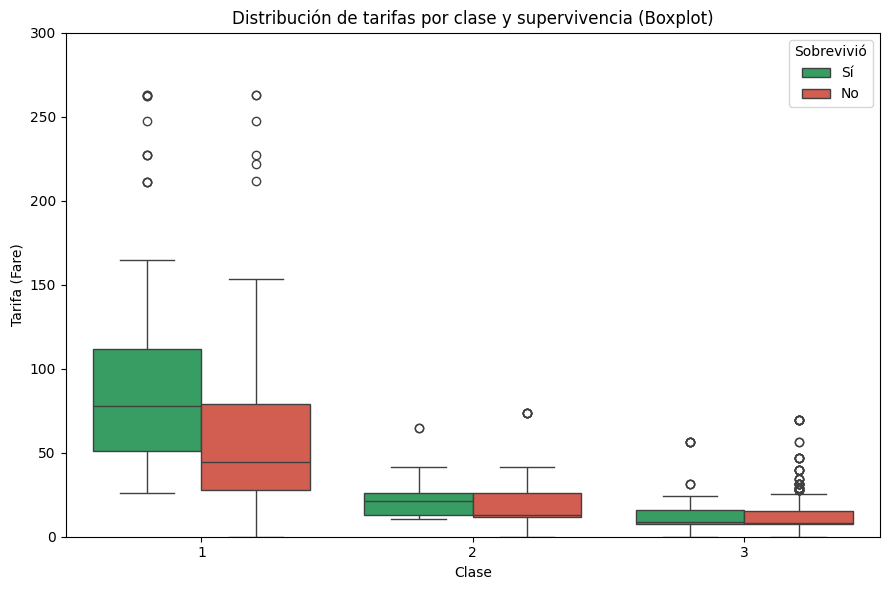

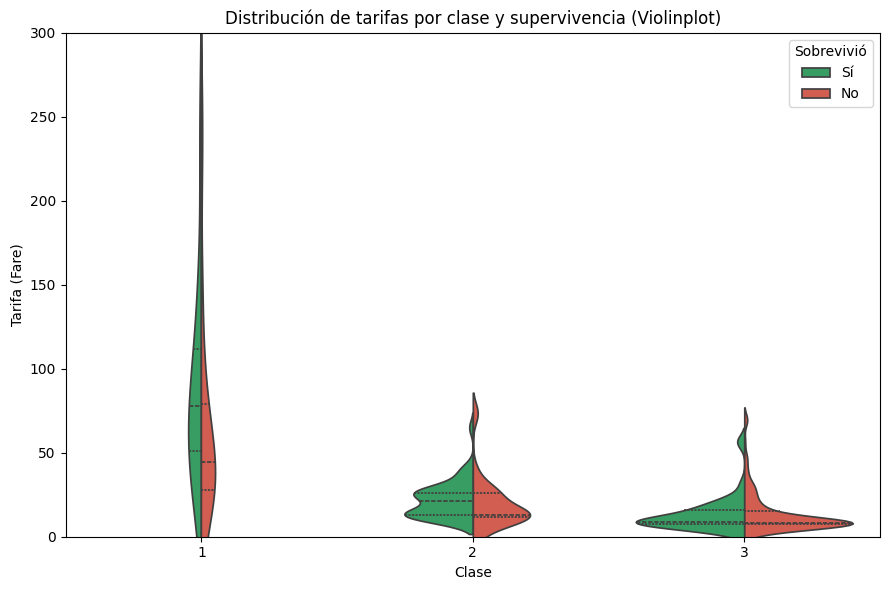

In [29]:
# --- 1) Crear columna categórica con etiquetas claras ---
df["Survived_label"] = df["Survived"].map({0: "No", 1: "Sí"})

# --- 2) Paleta personalizada ---
palette = {"No": "#E74C3C", "Sí": "#27AE60"}  # rojo = no sobrevivió, verde = sí sobrevivió

# --- 3) Boxplot ---
plt.figure(figsize=(9,6))
sns.boxplot(x="Pclass", y="Fare", hue="Survived_label", data=df, palette=palette)
plt.title("Distribución de tarifas por clase y supervivencia (Boxplot)")
plt.xlabel("Clase")
plt.ylabel("Tarifa (Fare)")
plt.ylim(0, 300)  # recorta para evitar distorsión por outliers extremos
plt.legend(title="Sobrevivió")
plt.tight_layout()
plt.show()

# --- 4) Violinplot ---
plt.figure(figsize=(9,6))
sns.violinplot(x="Pclass", y="Fare", hue="Survived_label",
               data=df, palette=palette, split=True, inner="quartile")
plt.title("Distribución de tarifas por clase y supervivencia (Violinplot)")
plt.xlabel("Clase")
plt.ylabel("Tarifa (Fare)")
plt.ylim(0, 300)
plt.legend(title="Sobrevivió")
plt.tight_layout()
plt.show()

Como podemos observar, en el boxplot nos damos cuenta que dentro de la primera clase hubo una gran diferencia entre lo que pagaron las personas que sobrevivieron y las que no, indicando que no solo bastaba estar en primera clase para asegurar tu supervivencia. En cuanto a la segunda clase esta diferencia de tarifa pagada se volvió mucho más pequeña, pero aun así, podemos observar que los que sobrevivieron pagaron lo que podría ser la tarifa más cara de segunda clase mientras los que no fueron aquellos que pagaron la tarifa mínima. 
Por último la tercera clase no tuvo distinción en cuanto a la tarifa  pagada, ya que la media en los que sobrevivieron y los que no fue prácticamente la misma.  El violinplot nos permite ver de mejor manera la diferencia de distribuciones entre la primera clase y la segunda y tercera ya que en primera clase vemos una distribución mucho más variada y con tarifas mucho más altas mientras que tercera y segunda clase permanecen en tarifas más bajas y mucho más concentradas en un solo rango de precios. 


### Supervivencia por tamaño de familia

Supervivencia por tamaño de familia:
  FamilyGroup  conteo  sobrevivieron  tasa
     Solo (1)     537            163  30.4
Pequeña (2–4)     292            169  57.9
Mediana (5–6)      37              6  16.2
  Grande (7+)      25              4  16.0


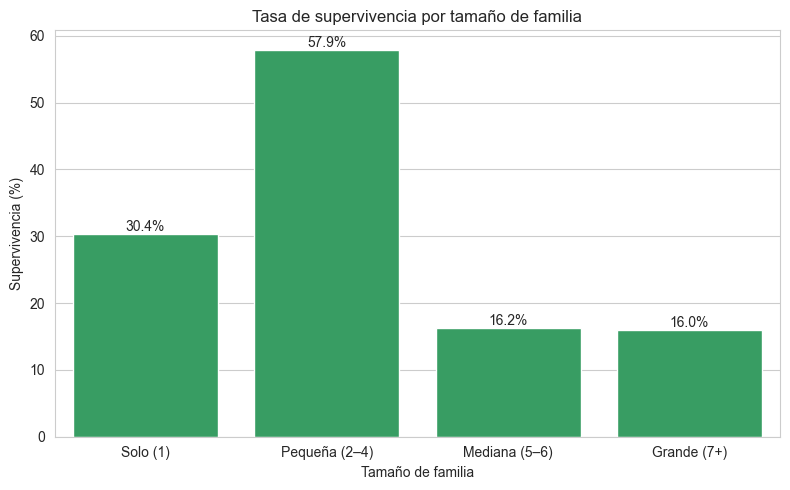

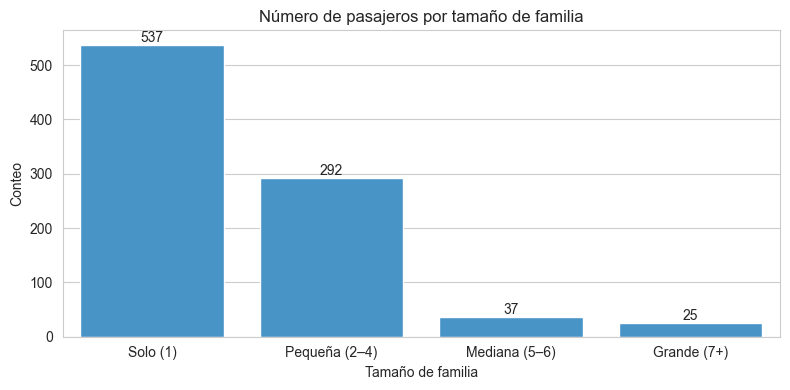

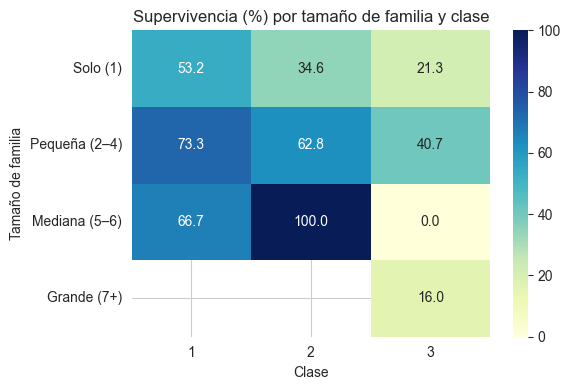

In [30]:
df2 = df.copy()

df2["FamilySize"] = df2["SibSp"].fillna(0) + df2["Parch"].fillna(0) + 1

bins   = [1, 2, 5, 7, np.inf]
labels = ["Solo (1)", "Pequeña (2–4)", "Mediana (5–6)", "Grande (7+)"]
df2["FamilyGroup"] = pd.cut(df2["FamilySize"], bins=bins, labels=labels, right=False)
orden_fg = pd.CategoricalDtype(categories=labels, ordered=True)
df2["FamilyGroup"] = df2["FamilyGroup"].astype(orden_fg)

summary = (
    df2.groupby("FamilyGroup",observed=False)["Survived"]
       .agg(conteo="count", sobrevivieron="sum", tasa=lambda s: 100*s.mean())
       .round({"tasa": 1})
       .reset_index()
)
print("Supervivencia por tamaño de familia:")
print(summary.to_string(index=False))

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
ax = sns.barplot(x="FamilyGroup", y="tasa", data=summary, color="#27AE60")
ax.set_title("Tasa de supervivencia por tamaño de familia")
ax.set_xlabel("Tamaño de familia")
ax.set_ylabel("Supervivencia (%)")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", (p.get_x()+p.get_width()/2, p.get_height()),
                ha="center", va="bottom", fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
ax2 = sns.barplot(x="FamilyGroup", y="conteo", data=summary, color="#3498DB")
ax2.set_title("Número de pasajeros por tamaño de familia")
ax2.set_xlabel("Tamaño de familia")
ax2.set_ylabel("Conteo")
for p in ax2.patches:
    ax2.annotate(f"{int(p.get_height())}", (p.get_x()+p.get_width()/2, p.get_height()),
                 ha="center", va="bottom", fontsize=10)
plt.tight_layout()
plt.show()

heat = (
    df2.groupby(["FamilyGroup","Pclass"],observed=False)["Survived"]
       .mean()
       .mul(100).round(1)
       .unstack("Pclass")
       .reindex(index=labels) 
)
plt.figure(figsize=(6,4))
sns.heatmap(heat, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Supervivencia (%) por tamaño de familia y clase")
plt.xlabel("Clase")
plt.ylabel("Tamaño de familia")
plt.tight_layout()
plt.show()

Observamos que todos los grupos de familia de clase alta tuvieron una supervivencia alta, mientras que las demás clases no tanto. Sin embargo, vemos que una familia pequeña o el ir solo en tercera clase aseguraba una mejor supervivencia que una familia mediana o grande

### Análisis por puerto

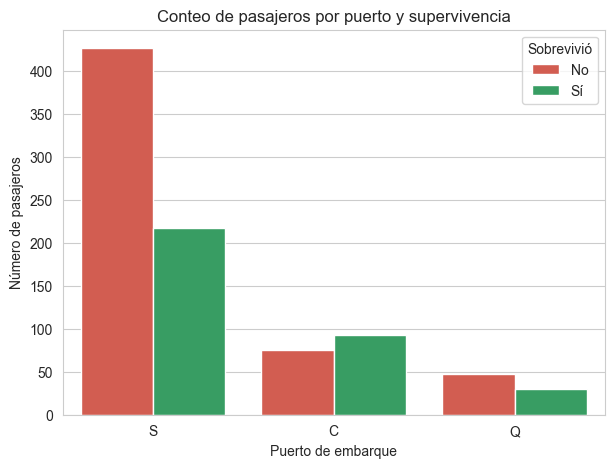

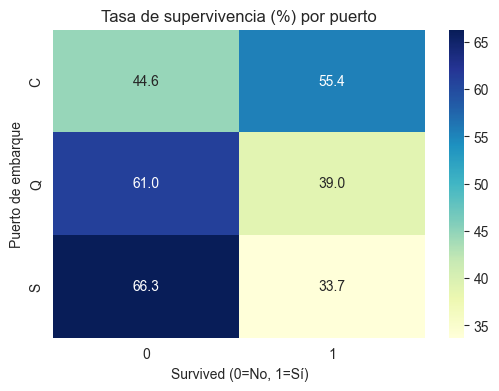

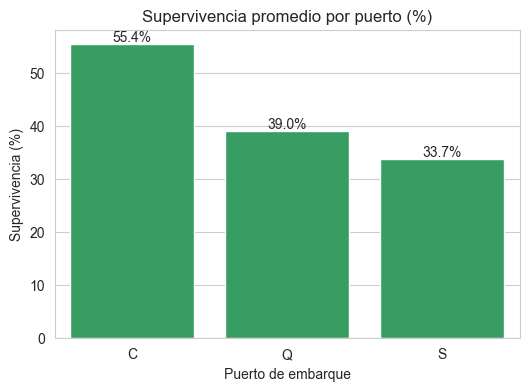

In [31]:
plt.figure(figsize=(7,5))
sns.countplot(x="Embarked", hue="Survived", data=df, palette={0:"#E74C3C",1:"#27AE60"})
plt.title("Conteo de pasajeros por puerto y supervivencia")
plt.xlabel("Puerto de embarque")
plt.ylabel("Número de pasajeros")
plt.legend(title="Sobrevivió", labels=["No", "Sí"])
plt.show()

# --- 2) Porcentaje de supervivencia por puerto ---
ct = pd.crosstab(df["Embarked"], df["Survived"], normalize="index")*100
plt.figure(figsize=(6,4))
sns.heatmap(ct, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Tasa de supervivencia (%) por puerto")
plt.xlabel("Survived (0=No, 1=Sí)")
plt.ylabel("Puerto de embarque")
plt.show()

# --- 3) Barplot de % de supervivencia por puerto ---
surv_rate = df.groupby("Embarked")["Survived"].mean().mul(100).reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x="Embarked", y="Survived", data=surv_rate, color="#27AE60")
plt.title("Supervivencia promedio por puerto (%)")
plt.xlabel("Puerto de embarque")
plt.ylabel("Supervivencia (%)")
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.1f}%", 
                       (p.get_x() + p.get_width()/2., p.get_height()), 
                       ha="center", va="bottom", fontsize=10)
plt.show()

El puerto que más tasa de supervivencia tuvo fue el de Cherbourg, probablemente donde embarcó la mayoría de la primera clase, mientras que el de Southampton tuvo la mayor cantidad de gente embarcada, probablemente la de tercera clase.

### Heatmap de superviencia de clase y sexo

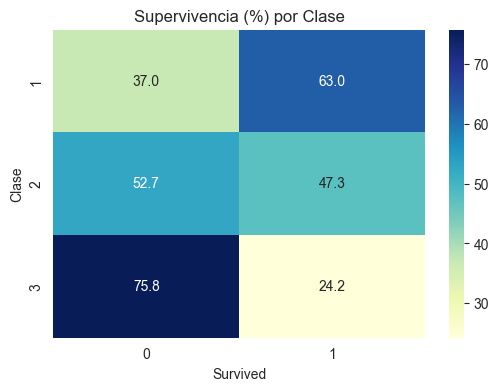

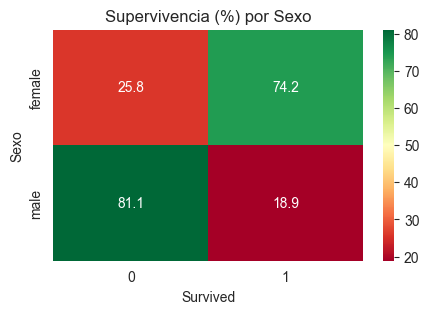

In [32]:
# Ejemplo: Clase vs Supervivencia (porcentajes)
ct = pd.crosstab(df["Pclass"], df["Survived"], normalize="index") * 100

plt.figure(figsize=(6,4))
sns.heatmap(ct, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Supervivencia (%) por Clase")
plt.xlabel("Survived")
plt.ylabel("Clase")
plt.show()

# Otro ejemplo: Sexo vs Supervivencia
ct2 = pd.crosstab(df["Sex"], df["Survived"], normalize="index") * 100
plt.figure(figsize=(5,3))
sns.heatmap(ct2, annot=True, fmt=".1f", cmap="RdYlGn")
plt.title("Supervivencia (%) por Sexo")
plt.xlabel("Survived")
plt.ylabel("Sexo")
plt.show()

Un poco mas evidente como es que las mujeres tenían una mayor tasa de supervivencia que los hombres

## Análisis de Valores Faltantes

### Valores faltantes por columna

In [33]:
df_nas = df.drop(columns=['AgeGroup'])
cant_na = df_nas.isna().sum()
porc_na = round((cant_na/len(df_nas))*100, 2)
faltantes = pd.DataFrame({'Valores_Faltantes': cant_na, 
                          'Porcentaje': porc_na}).sort_values('Porcentaje', ascending=False)
faltantes

,Valores_Faltantes,Porcentaje
Cabin,687,77.10
Age,177,19.87
GrupoEdad,177,19.87
Embarked,2,0.22
Name,0,0.00
PassengerId,0,0.00
Pclass,0,0.00
Survived,0,0.00
Parch,0,0.00
SibSp,0,0.00


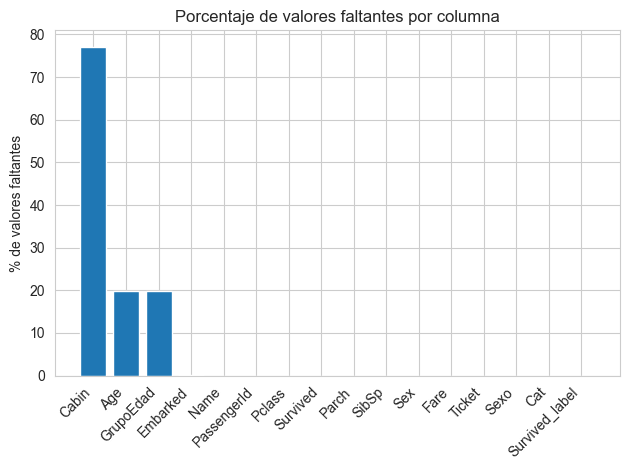

In [34]:
plt.figure()
plt.bar(faltantes.index, faltantes['Porcentaje'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('% de valores faltantes')
plt.title('Porcentaje de valores faltantes por columna')
plt.tight_layout()
plt.show()

### Patrones de valores faltantes

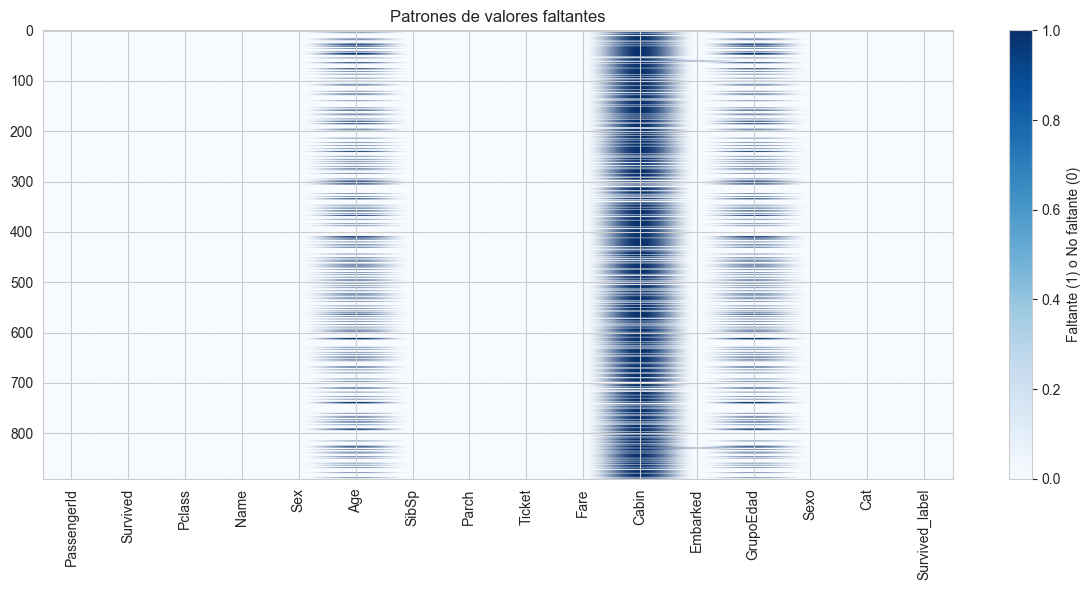

In [35]:
plt.figure(figsize=(12,6))
plt.imshow(df_nas.isna(), aspect='auto', cmap='Blues')
plt.colorbar(label='Faltante (1) o No faltante (0)')
plt.xticks(ticks=np.arange(len(df_nas.columns)), labels=df_nas.columns, rotation=90)
plt.title('Patrones de valores faltantes')
plt.tight_layout()
plt.show()

En cuanto a los datos faltantes, fue posible percibir una alta magnitud de estos en las columnas Cabin y Age (687 y 177 respectivamente), mientras que para Embarked existen 2 incidencias de este tipo. Al buscar patrones o relaciones entre estos campos faltantes por sí mismos, se puede decir que no fue claramente percibible que hubiera alguno. O sea, la falta de Cabin no provocaba la falta de Age ni viceversa. Sin embargo, sí se pudo observar que cada cierta cantidad de registros, había varios seguidos en los que Age no se encuentra capturado, por lo que esto quizá pueda reflejar una desatención que resultara periódica en dicho proceso cuando se efectuó. 


### ¿Aleatorios o sistemáticos?

In [36]:
df_nas['f_Age'] = df_nas['Age'].isna().astype(int)
df_nas['f_Cabin'] = df_nas['Cabin'].isna().astype(int)
df_nas['f_Embarked'] = df_nas['Embarked'].isna().astype(int)

#tasas por grupos
tasas_pclass = df_nas.groupby('Pclass')[['f_Age','f_Cabin']].mean().rename(
    columns={'f_Age':'Age_tasa_faltantes','f_Cabin':'Cabin_tasa_faltantes'})
tasas_sex = df_nas.groupby('Sex')[['f_Age','f_Cabin']].mean().rename(
    columns={'f_Age':'Age_tasa_faltantes','f_Cabin':'Cabin_tasa_faltantes'})
tasas_survived = df_nas.groupby('Survived')[['f_Age','f_Cabin']].mean().rename(
    columns={'f_Age':'Age_tasa_faltantes','f_Cabin':'Cabin_tasa_faltantes'})

display(tasas_pclass)
display(tasas_sex)
display(tasas_survived)

,Age_tasa_faltantes,Cabin_tasa_faltantes
Pclass,,
1,0.138889,0.185185
2,0.059783,0.913043
3,0.276986,0.975560


,Age_tasa_faltantes,Cabin_tasa_faltantes
Sex,,
female,0.168790,0.691083
male,0.214905,0.814558


,Age_tasa_faltantes,Cabin_tasa_faltantes
Survived,,
0,0.227687,0.876138
1,0.152047,0.602339


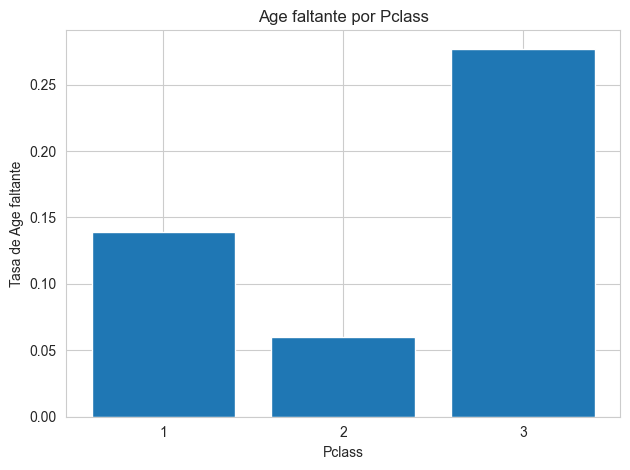

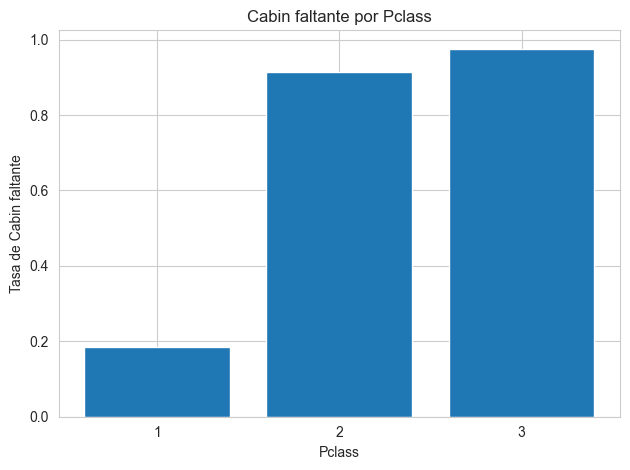

In [37]:
#Visualizaciones
plt.figure()
plt.bar(tasas_pclass.index.astype(str), tasas_pclass['Age_tasa_faltantes'])
plt.xlabel('Pclass'); plt.ylabel('Tasa de Age faltante'); plt.title('Age faltante por Pclass'); plt.tight_layout(); plt.show()

plt.figure()
plt.bar(tasas_pclass.index.astype(str), tasas_pclass['Cabin_tasa_faltantes'])
plt.xlabel('Pclass'); plt.ylabel('Tasa de Cabin faltante'); plt.title('Cabin faltante por Pclass'); plt.tight_layout(); plt.show()

### Estrategias preliminares de tratamiento para valores faltantes

Como estrategia de tratamiento preliminar de valores faltantes se propone derivar la variable Deck a partir de Cabin y asignar la categoría Unknown a los registros sin información, imputar la edad (Age) utilizando medidas de tendencia central por grupos (Pclass × Sex) o métodos de imputación más avanzados acompañados de un indicador de ausencia, completar los valores faltantes de Embarked con la moda global o con base en la relación entre tarifa y clase, y finalmente imputar el único valor faltante de Fare con la mediana correspondiente a su clase y puerto de embarque.